In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

# Import the data
train_db = pd.read_csv("data/titanic_train.csv")
test_db = pd.read_csv("data/titanic_test.csv")
gender_db = pd.read_csv("data/gender_submission.csv")

Column Information:

survival: Survival; 0 = No, 1 = Yes

pclass: Ticket class; 1 = 1st, 2 = 2nd, 3 = 3rd

sex: Sex

Age: Age (years)

sibsp: # of siblings/spouses aboard the Titanic

parch: # of parents/children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [47]:
# Check the data
train_db.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
test_db.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
# How kaggle wants predictions formatted
gender_db.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [50]:
# Convert male and female to integers
train_db.Sex.replace(['male', 'female'], [0,1], inplace=True)
test_db.Sex.replace(['male', 'female'], [0,1], inplace=True)

In [53]:
gender_db.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


array([[<AxesSubplot:title={'center':'Survived'}>]], dtype=object)

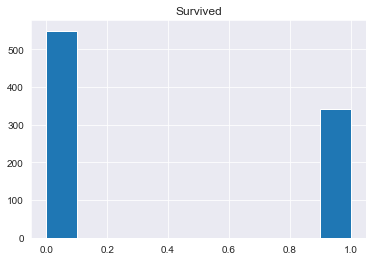

In [54]:
train_db.hist("Survived")

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

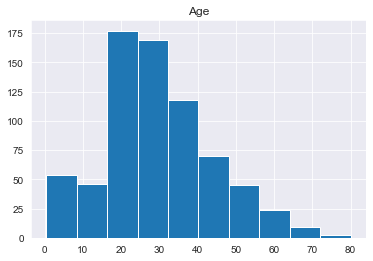

In [55]:
train_db.hist("Age")

array([[<AxesSubplot:title={'center':'Sex'}>]], dtype=object)

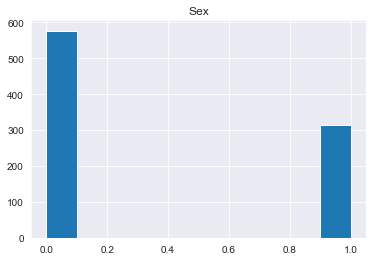

In [56]:
train_db.hist("Sex")

(array([[<AxesSubplot:title={'center':'SibSp'}>]], dtype=object),
 array([[<AxesSubplot:title={'center':'Parch'}>]], dtype=object))

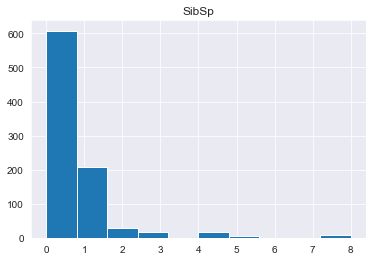

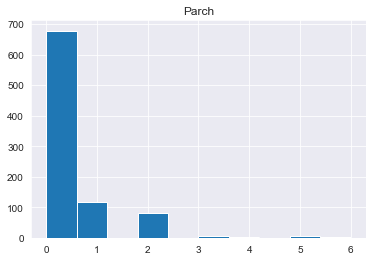

In [57]:
train_db.hist("SibSp"), train_db.hist("Parch")

array([[<AxesSubplot:title={'center':'Pclass'}>]], dtype=object)

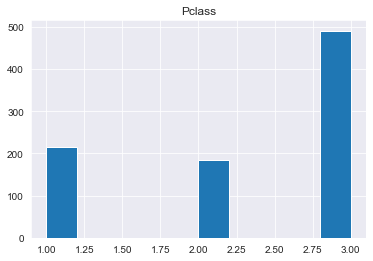

In [58]:
train_db.hist("Pclass")

<AxesSubplot:>

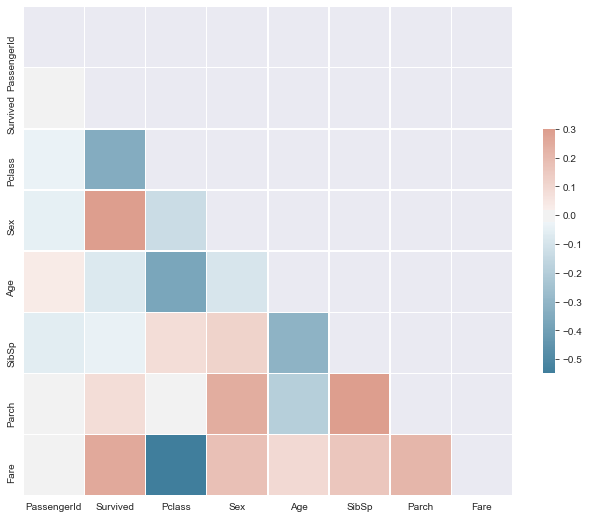

In [59]:
from string import ascii_letters

# Set the Style
sns.set_style("dark")

# Compute the correlation matrix
corr = train_db.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.pyplot.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [60]:
women = train_db.loc[train_db.Sex == 1]["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [61]:
men = train_db.loc[train_db.Sex == 0]['Survived']
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [21]:
# Set features
# selected_features = train_db[['Sex', 'Age']]
# test_features = test_db[['Sex', 'Age']]

In [62]:
# Code from the Kaggle tutorial on submissions
from sklearn.ensemble import RandomForestClassifier

y = train_db["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_db[features])
X_test = pd.get_dummies(test_db[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_db.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Using Kaggle's suggestions, we get a score of 0.7679. Let's get better!

In [66]:
# Using only sex and Pclass as features
features = ['Sex', 'Pclass']
X = pd.get_dummies(train_db[features])
X_test = pd.get_dummies(test_db[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_db.PassengerId, 'Survived': predictions})
output.to_csv('my_second_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


0.775... slightly better!

In [75]:
# Change n_estimators from 100 to 200
# Using only sex and Pclass as features
features = ['Sex', 'Pclass']
X = pd.get_dummies(train_db[features])
X_test = pd.get_dummies(test_db[features])

model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_db.PassengerId, 'Survived': predictions})
output.to_csv('my_third_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Dropped back down to 76%. Okay!

In [22]:
# Select the y-value from the training data and reshape and flatten
y = train_db.Survived

y = y.values.reshape(-1, 1)
y = y.flatten()

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

X_minmax = MinMaxScaler().fit(selected_features)


X_train_minmax = X_minmax.transform(selected_features)
X_test_minmax = X_minmax.transform(test_features)

In [24]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=6000)
model1
model1.fit(selected_features, y)

print(f"Training Data Score: {model1.score(selected_features, y)}")
# print(f"Testing Data Score: {model1.score(test_features, y)}")

Training Data Score: 0.7704918032786885


In [25]:
# Test the data

predictions = model1.predict(X_test_minmax)
print(f"First 10 Predictions:   {predictions[:10]}")

pd.DataFrame({"Prediction": predictions}).reset_index(drop=True)

First 10 Predictions:   [1 1 1 1 1 1 1 1 1 1]


,Prediction
0,1
1,1
2,1
3,1
4,1
...,...
82,1
83,1
84,1
85,1
